![](./graphs/dl_banner.jpg)

# 用tensorflow low level API构建线性回归模型
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

## 1.引入工具库

In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
import numpy.random as rnd

## 2.设定超参数

In [2]:
# 设定各种参数
learning_rate = 0.01  # 学习率
training_epochs = 1000 # 迭代轮次
display_step = 50 # 信息展示间隔轮次

## 3.准备数据，设定参数变量

In [3]:
# 给定一组训练数据
train_X = numpy.asarray([2.3,4.3,5.6,6.3,6.9,4.3,9.9,6.15,7.59,2.167,
                         7.4,10.9,5.3,7.9,5.4,9.2,3.1])
train_Y = numpy.asarray([1.3,2.76,2.09,3.01,1.9,1.7,3.6,2.6,2.5,1.2,
                         2.8,3.5,1.5,2.9,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# 占位符
X = tf.placeholder("float")
Y = tf.placeholder("float")

# 设定模型权重
W = tf.Variable(rnd.randn(), name="weight")
b = tf.Variable(rnd.randn(), name="bias")

## 4.完成模型构建
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

In [5]:
# 构建线性回归
# 想想线性回归是不是y=WX+b的形式
pred = tf.add(tf.multiply(X, W), b)

## 5.计算损失与优化器设定

In [6]:
# 计算损失函数
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# 初始化计算图中的变量（用默认值去赋值）
init = tf.global_variables_initializer()

## 6.在session当中完成计算图计算(损失计算与优化、参数更新迭代)
#### \[稀牛学院 x 网易云课程\]《深度学习工程师(实战)》课程资料 by [@寒小阳](https://blog.csdn.net/han_xiaoyang)

第0050轮 损失函数值为 0.130466491 当前的W为 0.38732392 当前的b为 -0.17892511
第0100轮 损失函数值为 0.123079553 当前的W为 0.37893105 当前的b为 -0.11839904
第0150轮 损失函数值为 0.116625465 当前的W为 0.37108523 当前的b为 -0.06181772
第0200轮 损失函数值为 0.110986501 当前的W为 0.36375073 当前的b为 -0.008924108
第0250轮 损失函数值为 0.106059738 当前的W为 0.3568943 当前的b为 0.0405221
第0300轮 损失函数值为 0.101755358 当前的W为 0.35048473 当前的b为 0.08674575
第0350轮 损失函数值为 0.097994789 当前的W为 0.3444929 当前的b为 0.12995662
第0400轮 损失函数值为 0.094709374 当前的W为 0.33889163 当前的b为 0.17035122
第0450轮 损失函数值为 0.091839120 当前的W为 0.3336554 当前的b为 0.20811336
第0500轮 损失函数值为 0.089331642 当前的W为 0.32876036 当前的b为 0.24341439
第0550轮 损失函数值为 0.087141126 当前的W为 0.3241844 当前的b为 0.2764147
第0600轮 损失函数值为 0.085227601 当前的W为 0.31990662 当前的b为 0.307264
第0650轮 损失函数值为 0.083556056 当前的W为 0.3159077 当前的b为 0.33610266
第0700轮 损失函数值为 0.082095906 当前的W为 0.31216955 当前的b为 0.36306164
第0750轮 损失函数值为 0.080820478 当前的W为 0.3086749 当前的b为 0.38826364
第0800轮 损失函数值为 0.079706438 当前的W为 0.30540803 当前的b为 0.41182315
第0850轮 损失函数值为 0.078733370 当前的W为 0.302354 当前的b

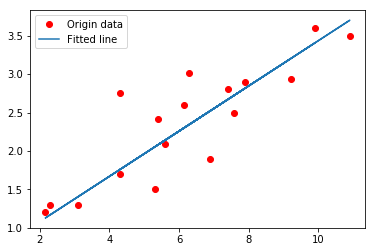

In [10]:
# 真正的训练过程
with tf.Session() as sess:
    sess.run(init)

    # 拟合训练数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # 每个epoch(完整的数据过一遍)之后输出信息
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print( "第%04d轮" % (epoch+1), "损失函数值为", "{:.9f}".format(c), \
                "当前的W为", sess.run(W), "当前的b为", sess.run(b))

    print("训练完成") 
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("训练集损失为", training_cost, "最终的W为", sess.run(W), "最终的b为", sess.run(b), '\n')

    #用matplotlib画一下原始数据点与拟合出来的直线
    plt.plot(train_X, train_Y, 'ro', label='Origin data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### 版权归 © 稀牛学院 所有 保留所有权利
![](./graphs/xiniu_neteasy.png)